<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N¬∞05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gr√°ficos adecuados para distintos tipos de variables y preguntas de an√°lisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene informaci√≥n sobre los t√≠tulos disponibles en la plataforma Netflix hasta el a√±o 2021.

| Variable       | Clase     | Descripci√≥n                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador √∫nico del t√≠tulo en el cat√°logo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | T√≠tulo del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | Pa√≠s o pa√≠ses donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el t√≠tulo fue agregado al cat√°logo de Netflix.              |
| release_year   | entero    | A√±o de lanzamiento original del t√≠tulo.                                     |
| rating         | caracter  | Clasificaci√≥n por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duraci√≥n del contenido (minutos o n√∫mero de temporadas para series).        |
| listed_in      | caracter  | Categor√≠as o g√©neros en los que est√° clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## üìä Parte 1: Exploraci√≥n visual b√°sica

1. **Distribuci√≥n de tipos de contenido**

   * Realiza un gr√°fico de barras mostrando la cantidad de pel√≠culas vs series (`type`).
   * Pregunta gu√≠a: ¬øCu√°l es el tipo de contenido predominante en Netflix? ¬øQu√© implicancias podr√≠a tener para los usuarios?

2. **Histograma de a√±os de lanzamiento**

   * Muestra c√≥mo se distribuyen los t√≠tulos seg√∫n su `release_year`.
   * Pregunta gu√≠a: ¬øHay m√°s contenido reciente o antiguo? ¬øNotas alg√∫n patr√≥n en d√©cadas espec√≠ficas?

3. **Proporci√≥n de clasificaciones por edad (`rating`)**

   * Haz un gr√°fico circular o de barras.
   * Pregunta gu√≠a: ¬øQu√© clasificaci√≥n es m√°s com√∫n? ¬øCrees que Netflix est√° m√°s enfocado en p√∫blico adulto, familiar o infantil?



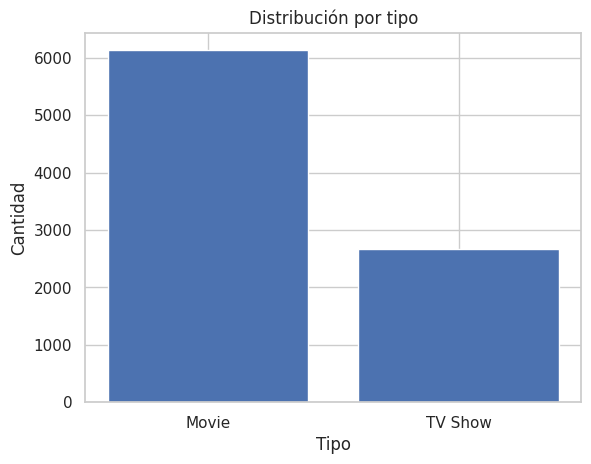

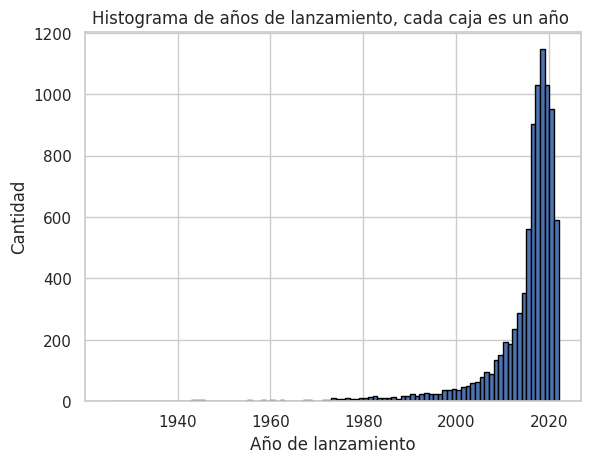

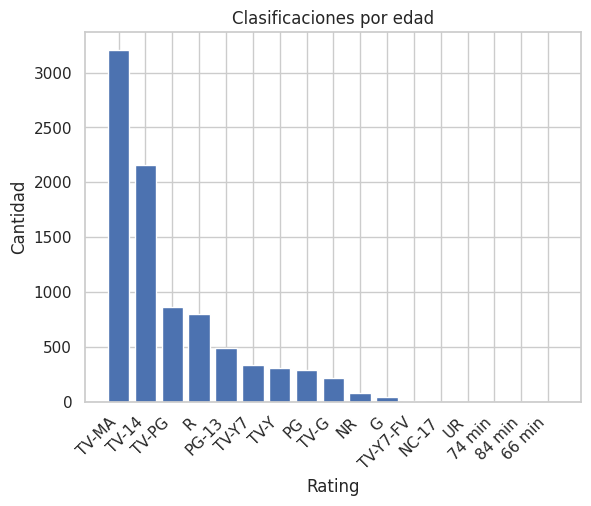

In [17]:
# FIXME




#ITEM 1---------------------------------------------------------------------------------------------------------------------------------------


x = ['Movie', 'TV Show'] #que va en x
y = [(df['type'] == 'Movie').sum(),
     (df['type'] == 'TV Show').sum()] #que va en y

plt.bar(x, y) #plot
plt.xlabel('Tipo') #texto de abajo
plt.ylabel('Cantidad') #del lado
plt.title('Distribuci√≥n por tipo') #titulo
plt.show() #muestra



#se denota que en netflix hay mas del doble de peliculas que de series
#podria ser que los usuarios prefieran ver peliculas, pero tambien hay que tener en cuenta la duracion de las series en comparacion a las peliculas
#o la cantidad de temporadas que estas tengan.

#ITEM 2-----------------------------------------------------------------------------------------------------------------------------------------

a√±os = df['release_year'].dropna().astype(int) #datos de los a√±os en los que laznzaron las peliculas, sin los datos vacios y los convierte a enteros
intervalo = range(a√±os.min(), a√±os.max() + 2)  # intervalos que se usaran en el plot, tienen un +2 para ajustar bien los valores del intervalo
plt.hist(a√±os, bins=intervalo, edgecolor='black')
plt.xlabel('A√±o de lanzamiento')
plt.ylabel('Cantidad')
plt.title('Histograma de a√±os de lanzamiento, cada caja es un a√±o ') #es un plot, me da lata explicar esto
plt.show()

#muestra cuando se creo el contenido que esta en netflix, lo que se ve es que
#la gran mayoria del contenido en netflix es reciente, el comportamiento de grafico es explonencial

#ITEM 3-----------------------------------------------------------------------------------------------------------------------------------------

datazos = df['rating'].dropna().value_counts() #datos sin contar vacios y sumando los datinhos iguales

plt.bar(datazos.index, datazos.values)
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Clasificaciones por edad') # un grafico
plt.xticks(rotation=45, ha='right') #pa q quepan los datos de x label
plt.show()

#lo que mas hay son peliculas para adultos, seguido de peliculas aptas para mayores de 14
#mas o menos te puedes dar la idea que netflix es un sitio para adolecentes para arriba




## üé® Parte 2: Tendencias y evoluci√≥n en el tiempo

4. **N√∫mero de t√≠tulos agregados por a√±o**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta gu√≠a: ¬øCu√°ndo creci√≥ m√°s el cat√°logo de Netflix? ¬øQu√© relaci√≥n podr√≠a tener con la expansi√≥n internacional de la plataforma?

5. **Heatmap de lanzamientos por a√±o y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta gu√≠a: ¬øHay meses con m√°s estrenos que otros? ¬øQu√© conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duraci√≥n de pel√≠culas por g√©nero**

   * Extrae la duraci√≥n en minutos y crea un boxplot agrupado por g√©nero principal.
   * Pregunta gu√≠a: ¬øQu√© g√©neros suelen durar m√°s? ¬øQu√© podr√≠as decir sobre la variabilidad dentro de un mismo g√©nero?


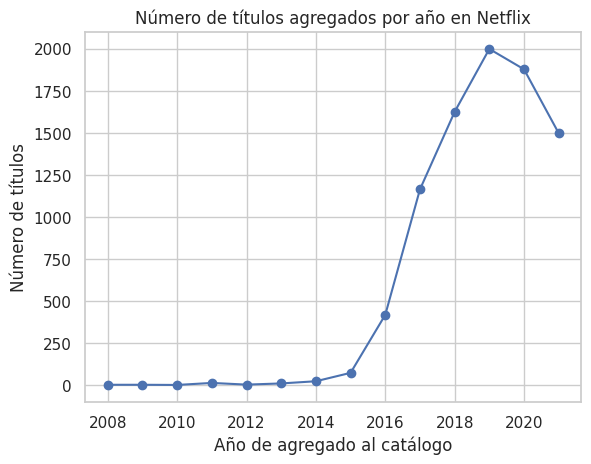

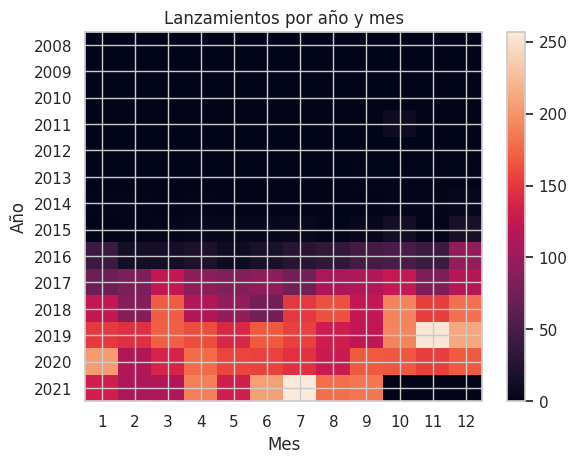

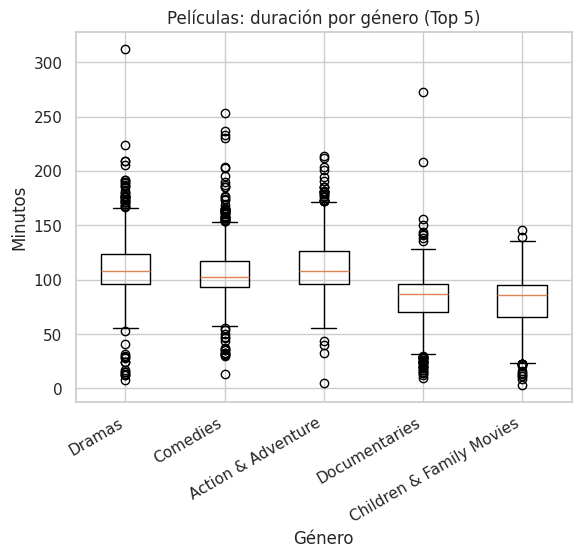

In [34]:
# FIXME
#ITEM 4-----------------------------------------------------------------------------------------------------------------------------------------
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') #convierte todo a datetime, por si acaso

df['year_added'] = df['date_added'].dt.year #simplemente toma los a√±os de la columna de date_added


a√±os = df['year_added'].dropna().value_counts().sort_index() #cuenta la cantidad de ddatos repetidos, sin contar vacios y los ordena



plt.plot(a√±os.index, a√±os.values, marker='o')
plt.xlabel('A√±o de agregado al cat√°logo')
plt.ylabel('N√∫mero de t√≠tulos')
plt.title('N√∫mero de t√≠tulos agregados por a√±o en Netflix')
plt.show()

# Se puede ver que el numero de titulos agregado en netflix crecio de manera exponencial hasta el 2019,
#luego hubo un declive en la cantidad a√±adida, esto podria ser resultado que ha comienzo de pandemia
#surgieron muchas mas plataformas de streaming de series
#ITEM 5-----------------------------------------------------------------------------------------------------------------------------------------


df['moth_added'] = df['date_added'].dt.month # polilla?

tab = pd.crosstab(df['date_added'].dt.year, df['date_added'].dt.month) #producto entre los a√±os y las polillas (hay que se consistente)

plt.imshow(tab, aspect='auto') # el aspecto esta en auto, no me gusto como se ve con blues
plt.colorbar() # colores
plt.xticks(range(tab.shape[1]), tab.columns.astype(int))      # label de meses, estan en valores enteros
plt.yticks(range(tab.shape[0]), tab.index.astype(int))  # los mismo q arriba
plt.xlabel('Mes') # si, es un grafico con cosas de grafico
plt.ylabel('A√±o')
plt.title('Lanzamientos por a√±o y mes')
plt.show()

# a simple vista se podria decir que salen mas contenido en noviembre y diciembre, y en febrero no ponen muchas cosas en netflix.

#ITEM 6-----------------------------------------------------------------------------------------------------------------------------------------
m = df[df['type'] == 'Movie'].copy() # m de movies
m['min']   = pd.to_numeric(m['duration'].str.extract(r'(\d+)')[0], errors='coerce') # te toma la duracao de los datinho
m['genre'] = m['listed_in'].str.split(',').str[0].str.strip() #los generos, se uso a conveniecia la ","para separar


top_m = m['genre'].value_counts().index[:5] # top 5 de las que quieres
data_m = [m.loc[m['genre']==g, 'min'].dropna().values for g in top_m] #seh, esta iterando dentro, hay formas mas faciles pero iterar adentro es chistoso

plt.boxplot(data_m)
plt.xticks(range(1, len(top_m)+1), top_m, rotation=30, ha='right')
plt.xlabel('G√©nero'); plt.ylabel('Minutos')
plt.title('Pel√≠culas: duraci√≥n por g√©nero (Top 5)')
plt.show()


#se podria decir que los dramas y las peliculas de aventura y accion duran mas,
# los documentales y peliculas para ni√±os duran menos en promedio



## üî• Parte 3: Comparaciones y relaciones

7. **Top 10 pa√≠ses con m√°s producciones**

   * Usa un gr√°fico de barras para mostrar los pa√≠ses m√°s frecuentes en la columna `country`.
   * Pregunta gu√≠a: ¬øQu√© pa√≠ses dominan el cat√°logo? ¬øSorprende la distribuci√≥n o es esperada?

8. **Pel√≠culas vs Series seg√∫n g√©nero**

   * Realiza un gr√°fico de barras apiladas para mostrar la cantidad de t√≠tulos por g√©nero, separando `Movie` y `TV Show`.
   * Pregunta gu√≠a: ¬øExisten g√©neros m√°s asociados a pel√≠culas o a series?

9. **Relaci√≥n entre duraci√≥n y a√±o de lanzamiento**

   * Haz un gr√°fico de dispersi√≥n (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta gu√≠a: ¬øHan cambiado los est√°ndares de duraci√≥n de las pel√≠culas con el tiempo? ¬øSe ven outliers interesantes?



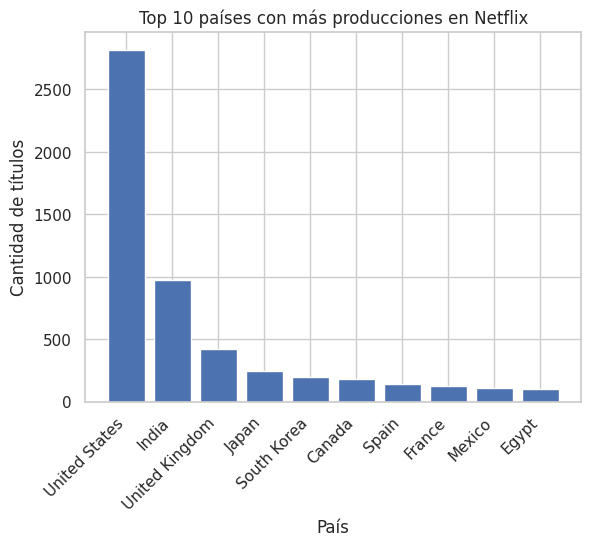

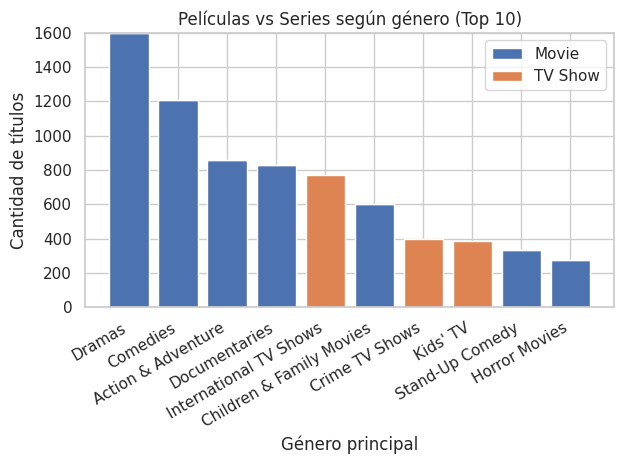

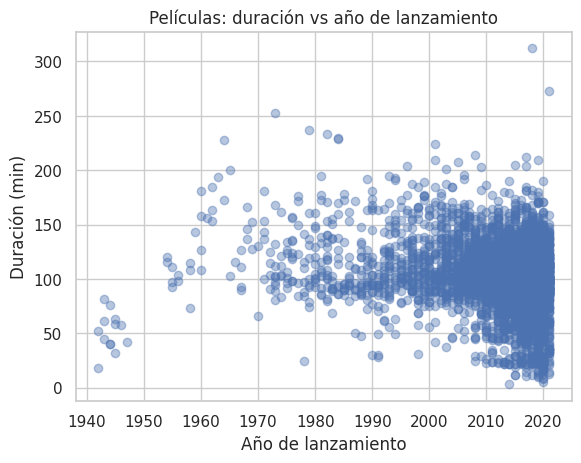

In [40]:
# FIXME

paises = df['country'].dropna().value_counts().head(10) #efectivamente paises

# Gr√°fico de barras
plt.bar(paises.index, paises.values)
plt.xlabel('Pa√≠s')
plt.ylabel('Cantidad de t√≠tulos')
plt.title('Top 10 pa√≠ses con m√°s producciones en Netflix')#cosas de grafico
plt.xticks(rotation=45, ha='right') #par q quepan
plt.show()

#domina EEUU seguido de India, lo cual tiene sentido pues Netflix es gringa y
# Hollywood es uno de los mayores productores de series/peliculas, luego viene india
#que es el mayor productor de peliculas del mundo, con ello se podria afirmar que tiene sentido los datos.

################################################################################



g = df['listed_in'].dropna().str.split(',').str[0].str.strip() #datos duros


tab = pd.crosstab(g, df.loc[g.index, 'type']).fillna(0) #matriz que se ploteara


top = tab.sum(axis=1).nlargest(10).index
tab = tab.loc[top]

# Asegurar columnas (por si falta alguna)
for col in ['Movie','TV Show']:
    if col not in tab.columns: tab[col] = 0

# Datos, pero refinados
x = range(len(tab))
movies = tab['Movie'].values
shows  = tab['TV Show'].values

# Grafico, con todas sus restricciones
plt.bar(x, movies, label='Movie')
plt.bar(x, shows, bottom=movies, label='TV Show')
plt.xticks(x, tab.index, rotation=30, ha='right')
plt.xlabel('G√©nero principal'); plt.ylabel('Cantidad de t√≠tulos')
plt.title('Pel√≠culas vs Series seg√∫n g√©nero (Top 10)')
plt.legend()
plt.tight_layout()
plt.show()


#se podria decir que el gneero mas consumido en series son peliculas internacionales
#(es decir, la gente ve series e otro paises no gringos), mientras lo que mas se ve en peliculas es
#drama





###########################################################################################




m['year'] = pd.to_numeric(m['release_year'], errors='coerce')
yeah = m.dropna(subset=['year','min']) #la cosa que se va a plotear, nmbre cualquiera, ya no me interesa

# Scatter a√±o vs minutos
plt.scatter(yeah['year'], yeah['min'], alpha=0.4) #la cosa de a√±o fue def antes
plt.xlabel('A√±o de lanzamiento')
plt.ylabel('Duraci√≥n (min)')
plt.title('Pel√≠culas: duraci√≥n vs a√±o de lanzamiento')
plt.show()


#si han cambiado, antes de los 50' las peliculas duraban menos de 100 mins en promedio
#despues de eso la cantidad de estandar se volvio 100 mins, hasta que a partir del
#2010 se emepzo a producir grandes cantidades de peliculas entre 150 y 0 mins (la duracion varia muchisimo y hay mucha cantidad).


## ‚≠ê Desaf√≠o Final

* Encuentra las combinaciones m√°s frecuentes de **g√©nero + rating** y repres√©ntalas en un **heatmap o gr√°fico de burbujas**.
* Pregunta gu√≠a: ¬øQu√© g√©neros est√°n m√°s dirigidos a un p√∫blico adulto? ¬øY cu√°les a p√∫blico familiar o infantil?

# FIXME